# Import Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Read Training Dataset

parse_dates can be used to parse date columns

In [2]:
file_path ='./data/train_timeseries.csv'
train_data = pd.read_csv(file_path, index_col='date', parse_dates=['date'])
train_data.describe()

,open,high,low,close,market_cap,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,...,transactions_per_sec_min,transactions_per_sec_max,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral
count,951.000000,951.000000,951.000000,951.000000,9.510000e+02,951.000000,951.000000,951.000000,951.000000,9.510000e+02,...,951.000000,951.000000,9.510000e+02,951.000000,9.510000e+02,9.510000e+02,951.000000,951.000000,951.000000,951.000000
mean,4488.426803,4625.494963,4332.740799,4491.791903,7.568775e+10,0.888219,128639.738049,1.201747,39.480158,2.107572e+12,...,1.204995,11.534700,5.156819e+07,24770.095836,5.152704e+07,5.161047e+07,418.628812,168.154574,192.353312,58.117771
std,4034.930785,4194.289934,3834.385171,4032.578345,6.838590e+10,0.138993,37848.150475,0.634863,36.422776,2.336768e+12,...,0.454583,5.701356,7.210016e+06,20924.758488,7.196346e+06,7.224068e+06,586.217698,251.943353,293.356907,68.426471
min,437.790000,443.430000,436.650000,438.710000,6.827425e+09,0.431452,66022.678050,0.324599,3.871172,1.786590e+11,...,0.000000,4.050000,3.678307e+07,2664.997103,3.672462e+07,3.682521e+07,1.000000,0.000000,0.000000,0.000000
25%,782.910000,793.060000,778.460000,787.720000,1.264200e+10,0.794628,94445.339335,0.773808,7.661564,3.101540e+11,...,0.983333,7.266667,4.480929e+07,12532.051380,4.477173e+07,4.483860e+07,23.000000,9.000000,7.000000,5.000000
50%,3420.400000,3679.720000,3345.830000,3582.880000,5.937800e+10,0.916414,128245.234800,1.019018,27.715090,8.881720e+11,...,1.216667,9.550000,5.404101e+07,18518.978080,5.401815e+07,5.407645e+07,99.000000,42.000000,29.000000,23.000000
75%,6899.150000,7110.560000,6719.755000,6898.720000,1.172135e+11,0.983195,163326.674200,1.443199,62.023002,3.511060e+12,...,1.483333,14.691667,5.598217e+07,28135.879670,5.595869e+07,5.599654e+07,718.500000,257.500000,308.000000,108.500000
max,19475.800000,20089.000000,18974.100000,19497.400000,3.265020e+11,1.218455,192791.543400,4.760788,161.686071,7.454970e+12,...,2.716667,42.716667,6.766664e+07,133326.986800,6.761686e+07,6.772137e+07,3064.000000,1530.000000,1842.000000,309.000000


In [3]:
train_data.head(5)

,open,high,low,close,market_cap,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,...,transactions_per_sec_min,transactions_per_sec_max,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral
date,,,,,,,,,,,,,,,,,,,,,
2018-11-30,4289.09,4322.98,3942.82,4017.27,6.990464e+10,1.209791,192791.5434,0.328777,21.396147,6.653300e+12,...,1.183333,17.700000,58319967.38,27106.89859,58281148,58355400,1071,356,549,166
2018-11-29,4269.00,4413.02,4145.77,4278.85,7.445102e+10,1.202130,192669.3545,0.625105,23.508462,6.653300e+12,...,1.283333,27.916667,58252488.42,15831.47820,58212951,58269350,1096,389,521,186
2018-11-28,3822.47,4385.90,3822.47,4257.42,7.407256e+10,1.111968,192543.1309,0.762892,24.411103,6.653300e+12,...,0.433333,33.850000,58186459.38,13193.95528,58165046,58213488,1187,409,583,195
2018-11-27,3765.95,3862.96,3661.01,3820.72,6.646897e+10,1.071254,192411.9186,0.730799,23.399753,6.653300e+12,...,1.683333,17.083333,58159562.88,9943.16102,58132945,58176825,1239,424,597,218
2018-11-26,4015.07,4107.14,3643.92,3779.13,6.573929e+10,1.186164,192271.5843,0.741989,21.745022,6.653300e+12,...,1.166667,27.200000,58120822.67,13528.76274,58082636,58135200,1343,454,670,219


# Visualization

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns# Set the width and height of the figure
sns.set(style="darkgrid")

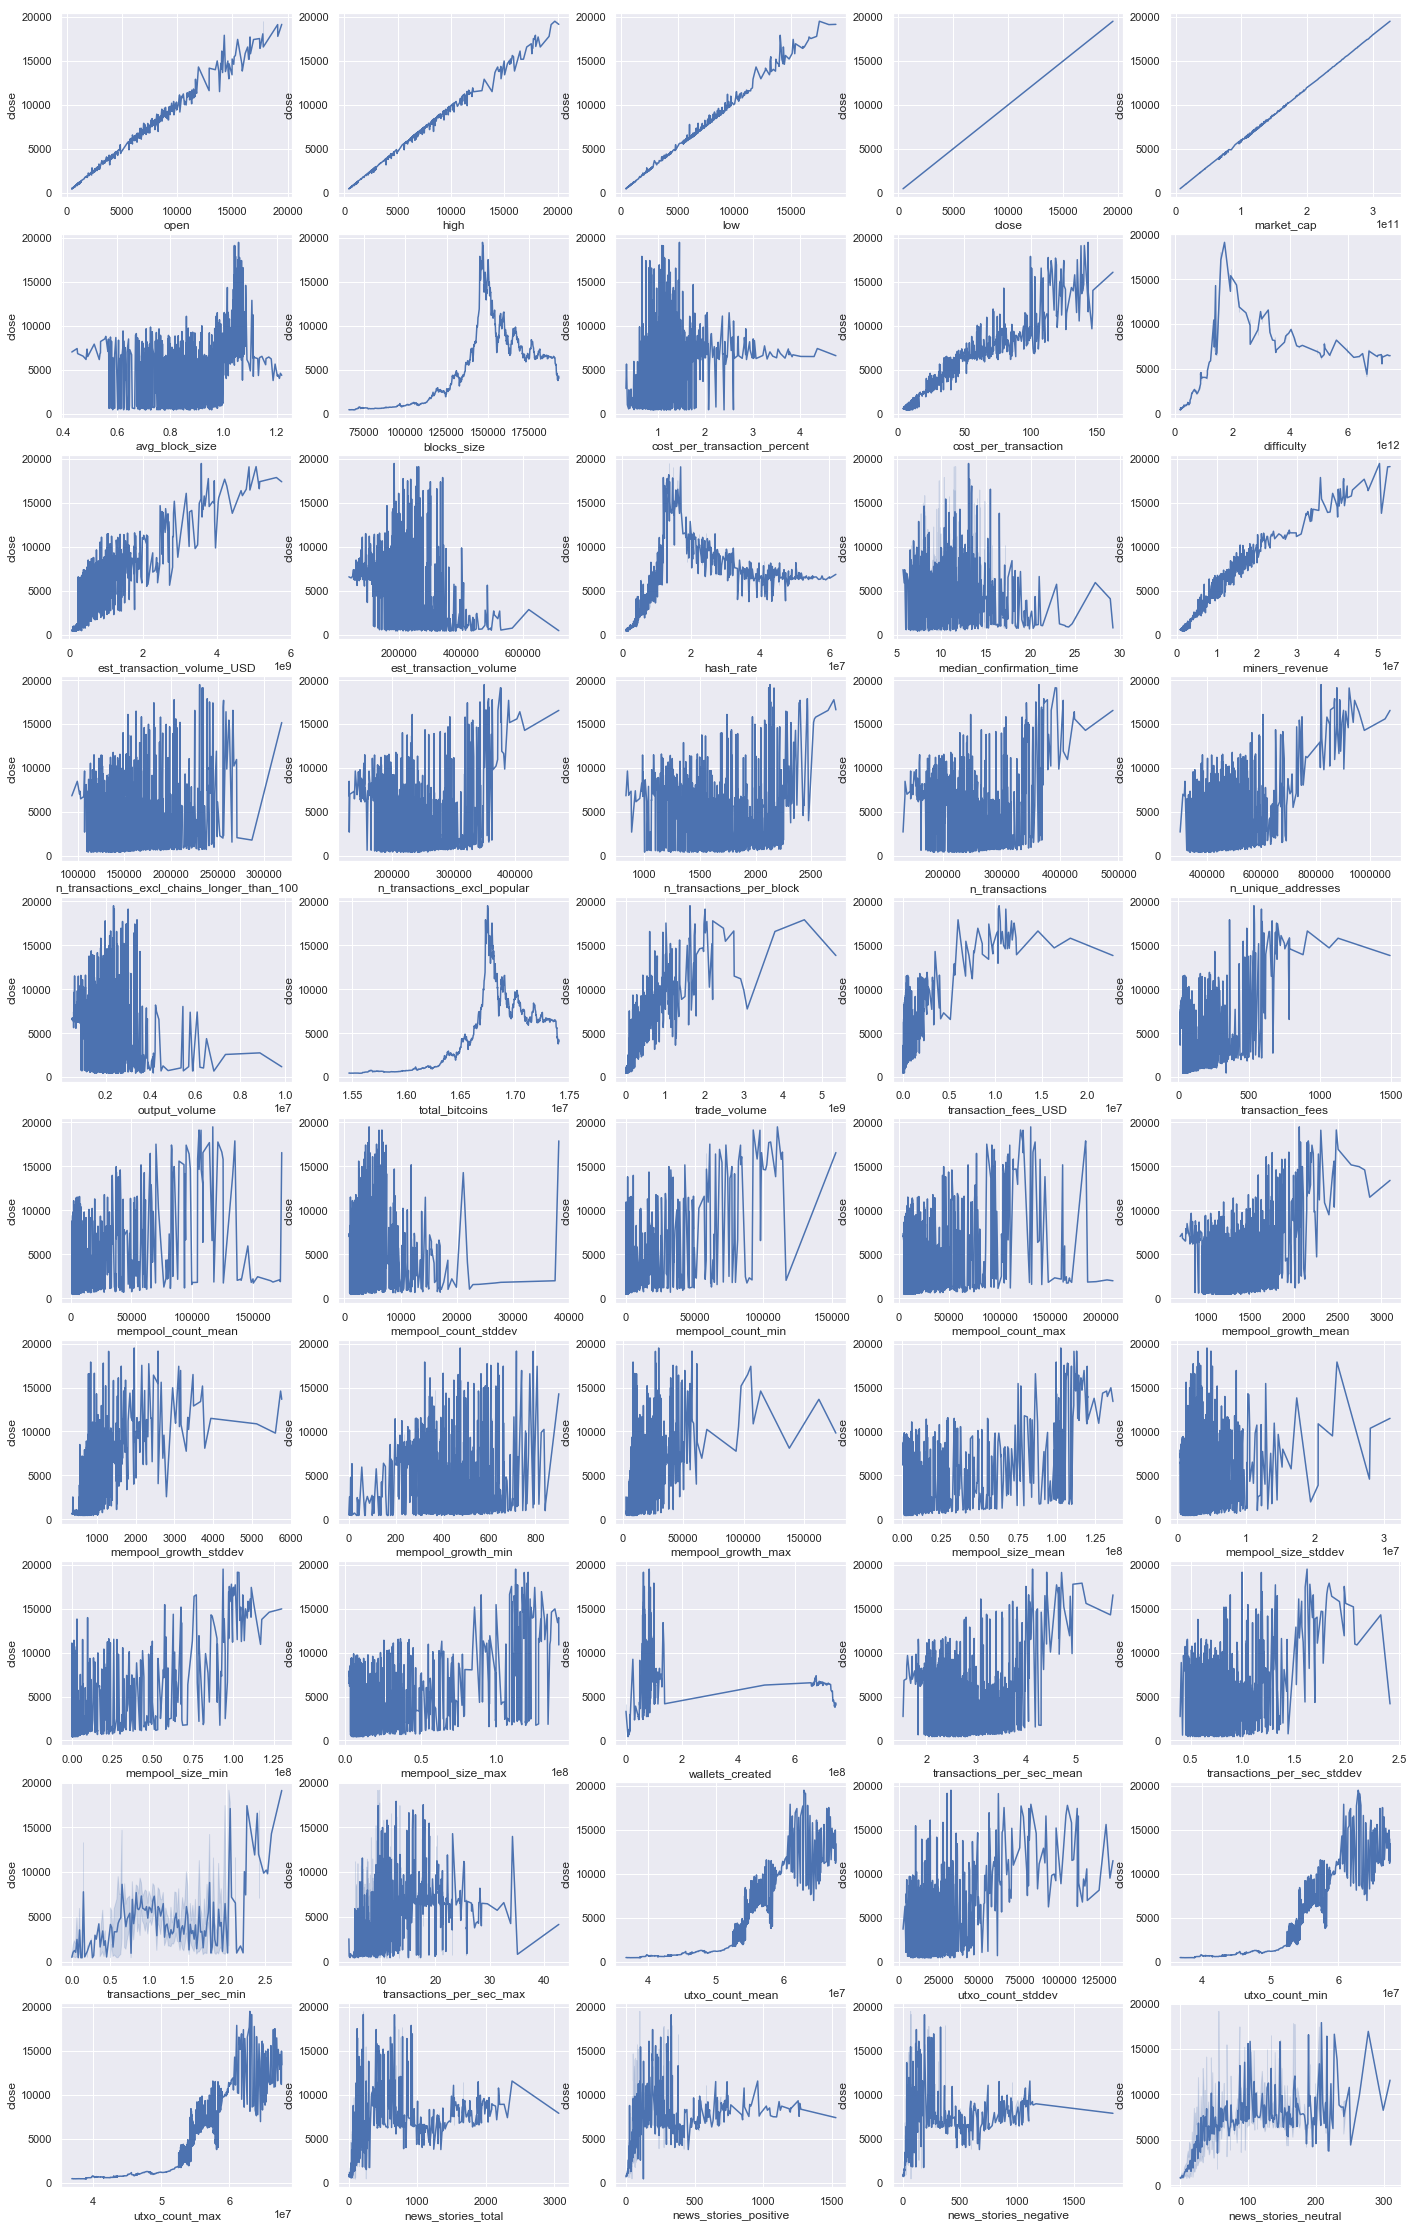

In [78]:
column_count = 0
for c in train_data.columns:
    column_count +=1

# Plot all the features
fig, ax = plt.subplots(10,5)
fig.set_size_inches(24,40)
i = 0
for c in range(0,10):
    for r in range(0,5):
        sns.lineplot(x=train_data.columns[i], y="close",data=train_data, ax=ax[c][r])
        i+=1

# Selecting Data for Modeling

In [ ]:
y = train_data.close
X = train_data[train_data.columns]

## 1. Parsing Columns Types (Dates)

In [ ]:
# train_x['parsed_date'] = pd.to_datetime(train_x['date'], infer_datetime_format=True)
# train_x['parsed_date'] = pd.to_datetime(train_x['parsed_date'], format = "%m/%d/%y") #Explicit Formating

## 2. Selecting Columns

In [ ]:
X.drop(['close','date'],inplace=True, axis=1)

# Building the Model

## 1. Define the Model

In [ ]:
# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X, y)

In [ ]:
print("Making predictions for the following 5 rows:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

In [ ]:
print(y.head())

# Model Validation

In [ ]:
from sklearn.metrics import mean_absolute_error


In [ ]:
predicted_close_prices = model.predict(X)
mean_absolute_error(y, predicted_close_prices)

## 1. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
model = DecisionTreeRegressor()
# Fit model
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

# Underfitting and OverFitting

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))